In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [2]:
dataset=sns.load_dataset('iris')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [4]:
dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:

#seperate the traing and th etest data
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [6]:
# traint he data on svm model 
model=SVC()
model.fit(X_train,y_train)


SVC()

In [7]:
model.score(X_test,y_test) # 0.9666666666666667

0.9666666666666667

In [8]:
poly_kernel=SVC(kernel='poly')
poly_kernel.fit(X_train,y_train)
poly_kernel.score(X_test,y_test) # 0.9666666666666667

0.9666666666666667

In [12]:
sigmoid_kernel=SVC(kernel='sigmoid' , gamma=0.1, coef0=0.1)
sigmoid_kernel.fit(X_train,y_train)
sigmoid_kernel.score(X_test,y_test) # 0.9666666666666667


0.23333333333333334

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

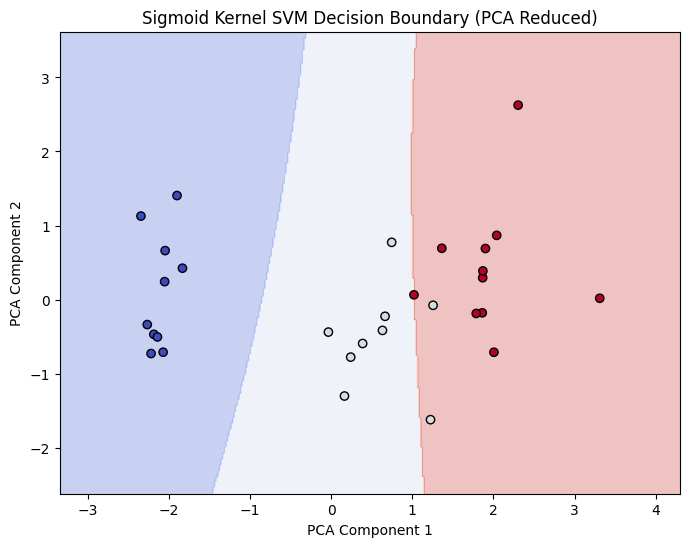

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Load dataset
dataset = sns.load_dataset('iris')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Train SVM with sigmoid kernel
sigmoid_kernel = SVC(kernel='sigmoid', gamma=0.1, coef0=0.1)
sigmoid_kernel.fit(X_train, y_train)

# Plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(handles=scatter.legend_elements()[0], labels=le.classes_)
    plt.show()

plot_decision_boundary(sigmoid_kernel, X_test, y_test, "Sigmoid Kernel SVM Decision Boundary (PCA Reduced)")


In [4]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    
    # Automatically generate legend based on unique classes in y
    class_labels = np.unique(y)
    handles = []
    for label in class_labels:
        handles.append(plt.Line2D([], [], marker='o', linestyle='', 
                                  color=plt.cm.coolwarm(label / len(class_labels)), 
                                  label=f'Class {label}'))
    plt.legend(handles=handles, title="Classes")
    
    plt.show()
